# Explaratory Data Analysis

Data Dictionary


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/titanic/train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df['Gender'] = 0
df.loc[df['Sex']=='male', 'Gender'] = 1

In [8]:
df.drop(['PassengerId','Name','Ticket','Sex','Cabin'],axis=1,inplace=True)

In [9]:
df.shape

(891, 8)

In [10]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [12]:
df[(df['SibSp']!=0)&(df['Parch']!=0)]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
7,0,3,2.0,3,1,21.0750,S,1
10,1,3,4.0,1,1,16.7000,S,0
13,0,3,39.0,1,5,31.2750,S,1
16,0,3,2.0,4,1,29.1250,Q,1
24,0,3,8.0,3,1,21.0750,S,0
...,...,...,...,...,...,...,...,...
856,1,1,45.0,1,1,164.8667,S,0
863,0,3,NaN,8,2,69.5500,S,0
869,1,3,4.0,1,1,11.1333,S,1
871,1,1,47.0,1,1,52.5542,S,0


In [13]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender'],
      dtype='object')

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
print("minimum age of the passenger ",df['Age'].min())
print("maximum age of the passenger ",df['Age'].max())
print("mean age of the passenger ",df['Age'].mean())
print("median age of the passenger ",df['Age'].median())
print("mode age of the passenger ",df['Age'].mode())

minimum age of the passenger  0.42
maximum age of the passenger  80.0
mean age of the passenger  29.69911764705882
median age of the passenger  28.0
mode age of the passenger  0    24.0
dtype: float64


In [19]:
df['age_range'] = pd.cut(df['Age'], bins=8)
df['age_group'] = 0

In [20]:
def grouped(x):
    c = x.right
    if c < 11:
        return 1
    elif c < 21:
        return 2
    elif c < 31:
        return 3
    elif c < 41:
        return 4
    elif c < 51:
        return 5
    elif c < 61:
        return 6
    elif c < 71:
        return 7
    elif c < 81:
        return 8

In [21]:
df['age_group'] = df['age_range'].apply(grouped)

In [22]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,age_range,age_group
0,0,3,22.0,1,0,7.2500,S,1,"(20.315, 30.263]",3
1,1,1,38.0,1,0,71.2833,C,0,"(30.263, 40.21]",4
2,1,3,26.0,0,0,7.9250,S,0,"(20.315, 30.263]",3
3,1,1,35.0,1,0,53.1000,S,0,"(30.263, 40.21]",4
4,0,3,35.0,0,0,8.0500,S,1,"(30.263, 40.21]",4
5,0,3,NaN,0,0,8.4583,Q,1,NaN,NaN
6,0,1,54.0,0,0,51.8625,S,1,"(50.158, 60.105]",6
7,0,3,2.0,3,1,21.0750,S,1,"(0.34, 10.368]",1
8,1,3,27.0,0,2,11.1333,S,0,"(20.315, 30.263]",3
9,1,2,14.0,1,0,30.0708,C,0,"(10.368, 20.315]",2


In [52]:
df2 = df.dropna()

In [44]:
df2.isna().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Gender          0
age_range       0
age_group       0
total_member    0
dtype: int64

In [59]:
age_wise = pd.DataFrame()
age_wise['total'] = df2.loc[:,'age_group'].value_counts()
age_wise['surv'] = df2.loc[df['Survived']==1,'age_group'].value_counts()
age_wise['dead'] = df2.loc[df['Survived']==0,'age_group'].value_counts()
age_wise['tot_'] = df2.loc[df['Survived']==1,'age_group'].value_counts() + \
df2.loc[df['Survived']==0,'age_group'].value_counts()

In [62]:
age_wise['pct_live'] = age_wise['surv']*100 / age_wise['total']
age_wise.sort_values('pct_live', ascending=False)

,total,surv,dead,tot_,pct_live
1,64,38,26,64,59.375000
4,154,68,86,154,44.155844
6,42,17,25,42,40.476190
5,86,33,53,86,38.372093
2,115,44,71,115,38.260870
3,230,84,146,230,36.521739
8,5,1,4,5,20.000000
7,16,3,13,16,18.750000


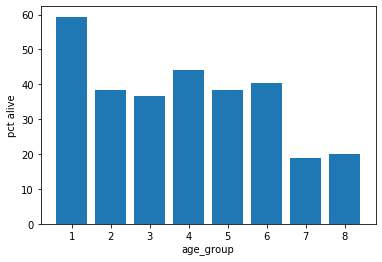

In [65]:
plt.bar(age_wise.index, age_wise['pct_live'])
plt.xlabel('age_group')
plt.ylabel('pct alive')
plt.show()

In [66]:
df['total_member'] = df['SibSp'] + df['Parch'] + 1

In [67]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,age_range,age_group,total_member
0,0,3,22.0,1,0,7.2500,S,1,"(20.315, 30.263]",3,2
1,1,1,38.0,1,0,71.2833,C,0,"(30.263, 40.21]",4,2


In [78]:
mem_wise = pd.DataFrame()
mem_wise['total'] = df2['total_member'].value_counts()
mem_wise['alive'] = df2.loc[df2['Survived']==1, 'total_member'].value_counts()
mem_wise['dead'] = df2.loc[df2['Survived']==0, 'total_member'].value_counts()
mem_wise = mem_wise.fillna(0)

In [79]:
mem_wise['tot_'] = mem_wise['alive'] + mem_wise['dead']
mem_wise['live_pct'] = mem_wise['alive']*100 / mem_wise['total']
mem_wise.sort_values('live_pct', ascending=False)

,total,alive,dead,tot_,live_pct
4,27,21.0,6,27.0,77.777778
3,93,53.0,40,93.0,56.989247
2,139,76.0,63,139.0,54.676259
7,12,4.0,8,12.0,33.333333
1,402,128.0,274,402.0,31.840796
5,11,3.0,8,11.0,27.272727
6,22,3.0,19,22.0,13.636364
8,6,0.0,6,6.0,0.000000


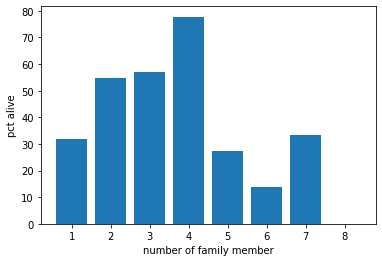

In [80]:
plt.bar(mem_wise.index, mem_wise['live_pct'])
plt.xlabel('number of family member')
plt.ylabel('pct alive')
plt.show()

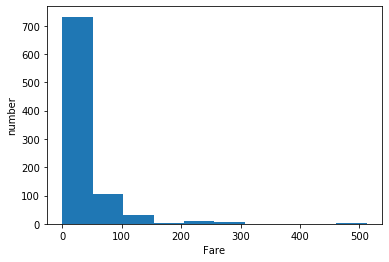

In [27]:
plt.hist(df['Fare'])
plt.xlabel('Fare')
plt.ylabel('number')
plt.show()

In [82]:
cls_wise = pd.DataFrame()
cls_wise['total'] = df2['Pclass'].value_counts()
cls_wise['alive'] = df2.loc[df2['Survived']==1, 'Pclass'].value_counts()
cls_wise['dead'] = df2.loc[df2['Survived']==0, 'Pclass'].value_counts()
cls_wise = cls_wise.fillna(0)

In [83]:
cls_wise['tot_'] = cls_wise['alive'] + cls_wise['dead']
cls_wise['live_pct'] = cls_wise['alive']*100 / cls_wise['total']
cls_wise.sort_values('live_pct', ascending=False)

,total,alive,dead,tot_,live_pct
1,184,120,64,184,65.217391
2,173,83,90,173,47.976879
3,355,85,270,355,23.943662


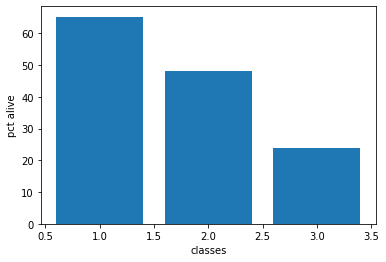

In [84]:
plt.bar(cls_wise.index, cls_wise['live_pct'])
plt.xlabel('classes')
plt.ylabel('pct alive')
plt.show()

In [86]:
sex_wise = pd.DataFrame()
sex_wise['total'] = df2['Gender'].value_counts()
sex_wise['alive'] = df2.loc[df2['Survived']==1, 'Gender'].value_counts()
sex_wise['dead'] = df2.loc[df2['Survived']==0, 'Gender'].value_counts()
sex_wise = sex_wise.fillna(0)

In [87]:
sex_wise['tot_'] = sex_wise['alive'] + sex_wise['dead']
sex_wise['live_pct'] = sex_wise['alive']*100 / sex_wise['total']
sex_wise.sort_values('live_pct', ascending=False)

,total,alive,dead,tot_,live_pct
0,259,195,64,259,75.289575
1,453,93,360,453,20.529801


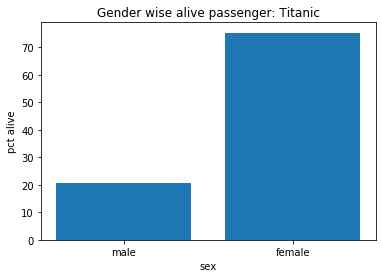

In [94]:
plt.bar(['male', 'female'], sex_wise['live_pct'])
plt.xlabel('sex')
plt.ylabel('pct alive')
plt.title('Gender wise alive passenger: Titanic')
plt.show()

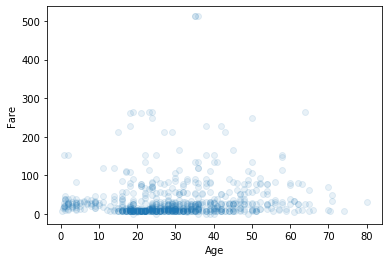

In [28]:
plt.scatter(df['Age'], df['Fare'], alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [95]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,age_range,age_group,total_member
0,0,3,22.0,1,0,7.2500,S,1,"(20.315, 30.263]",3,2
1,1,1,38.0,1,0,71.2833,C,0,"(30.263, 40.21]",4,2
2,1,3,26.0,0,0,7.9250,S,0,"(20.315, 30.263]",3,1
3,1,1,35.0,1,0,53.1000,S,0,"(30.263, 40.21]",4,2
4,0,3,35.0,0,0,8.0500,S,1,"(30.263, 40.21]",4,1


In [97]:
df2['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [98]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [102]:
em = ohe.fit_transform(df2[['Embarked']]).toarray()

In [103]:
em

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [108]:
df3 = df2[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked','Gender','age_group','total_member']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
Survived        712 non-null int64
Pclass          712 non-null int64
Age             712 non-null float64
SibSp           712 non-null int64
Parch           712 non-null int64
Fare            712 non-null float64
Embarked        712 non-null object
Gender          712 non-null int64
age_group       712 non-null category
total_member    712 non-null int64
dtypes: category(1), float64(2), int64(6), object(1)
memory usage: 56.7+ KB


In [111]:
df3.loc[:,'age_group'] = df3['age_group'].astype(int)

In [112]:
df3 = pd.get_dummies(df3)

In [113]:
df3

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,age_group,total_member,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,3,2,0,0,1
1,1,1,38.0,1,0,71.2833,0,4,2,1,0,0
2,1,3,26.0,0,0,7.9250,0,3,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,4,2,0,0,1
4,0,3,35.0,0,0,8.0500,1,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,4,6,0,1,0
886,0,2,27.0,0,0,13.0000,1,3,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,2,1,0,0,1
889,1,1,26.0,0,0,30.0000,1,3,1,1,0,0


In [131]:
import statsmodel.formula.api as smf

ModuleNotFoundError: No module named 'statsmodel'